In [9]:
import pandas as pd
from matplotlib import pyplot as plt
from plotly import graph_objs as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import pandas as pd
import math

# from matplotlib.pyplot import figure
# figure(figsize=(8, 6), dpi=80)b

plt.rcParams["figure.figsize"] = (20,3)

In [5]:
data_ = pd.read_csv("trial_exp_1.csv")
data_

,[run number],1,2,3,4,5
0,acceleration,0.002,0.003,0.00500,0.00600,0.00700
1,max-patience,50.000,50.000,50.00000,50.00000,50.00000
2,number-of-cars,40.000,40.000,40.00000,40.00000,40.00000
3,deceleration,0.020,0.020,0.02000,0.02000,0.02000
4,[final],7247.816,12083.757,13721.30089,15403.78049,15428.78414
...,...,...,...,...,...,...
92833,NaN,NaN,12039.243,NaN,NaN,NaN
92834,NaN,NaN,12039.243,NaN,NaN,NaN
92835,NaN,NaN,12039.243,NaN,NaN,NaN
92836,NaN,NaN,12039.243,NaN,NaN,NaN


In [10]:
# want a class that just has to load the data-set once

# can exclude certain columns of data if need be

# can create different plots if need be

# have to create dynamic visualisations if needed 

# think about how it could be made efficient based on the loading time

# think of some plots to compare more than one variables (maybe against each other)

In [57]:
class Analyse:
    
    def __init__(self, path):
        
        # read in the data
        self.data = pd.read_csv(path, low_memory=False)
        
        # get the number of columns which are the number of runs done for analysis
        self.cols = self.data.shape[1] - 1
        
        # get a dictionary of all the characteristics avaiables (basically they are all variables)
        self.characteristics = self.get_characteristics()
        
        # get the formatted version that could be used to plot the data
        self.lane_data_temp = self.get_all_lanes_data()
        
        # array for the number of turns (right now the only variable for testing)
        self.turns = []
    
    # function to return the values (characteristics) in a form of dictionary
    def get_characteristics(self):
        
        # dictionary to store all the values
        values = {}
        
        # for loop to loop to those variables
        for col in range(self.cols):
            temp = {}
            
            key_data = self.data["[run number]"][:5]
            temp_data = self.data[str(col+1)][:5]
            
            for key in range(5):
                temp[key_data[key]] = temp_data[key]
                
            values[col+1] = temp
        
        return values
    
    # function to get all the lanes data in a plottable format
    def get_all_lanes_data(self):
        
        # empty array that is to be returned
        values = []
        
        # for loop to get all the values
        for col in range(self.cols):
            
            # send in the data for the corresponding column
            temp_arr = self.get_array(self.data[str(col+1)][10:])
            values.append(temp_arr)
        
        return values
    
    # function to get a single array in the required version
    def get_array(self, data):
        
        # empty array which is to be returned
        array = []
        
        for val in data: 
            array.append(val)
            
        # get all the values that are not nan (refactor this part if you get time in future)
        for i in range(len(array)-1, -1, -1):
            
            if not math.isnan(array[i]):
                array = array[:i+1]
                break
        
        # return the array after passing the array to a diffrent function
        return self.get_lane_change_array(array)
        
    # function to get an array of the tick when a turn took place
    def get_lane_change_array(self, array):
        
        # empty array
        res = [0]
        curr = 0
        
        for idx, val in enumerate(array):
            if curr != val:
                curr = val
                res.append(idx)
        
        return res
    
    # function to generate a line plot for now
    def plot_line_plot(self, variable):
        
        titles = self.get_titles(variable)
        
        for idx, column in enumerate(self.lane_data_temp):
            
            self.turns = [i for i in range(len(column))]
            plt.plot(column, self.turns, label = str(titles[idx]))
            
        plt.legend()
        plt.show()
        
    # function to get the variable values as titles
    def get_titles(self, target):
        
        res = []
        
        for _, values in self.characteristics.items():
            res.append(values[target])
        
        return res
        

In [58]:
run_3 = Analyse("trial_exp_1.csv")

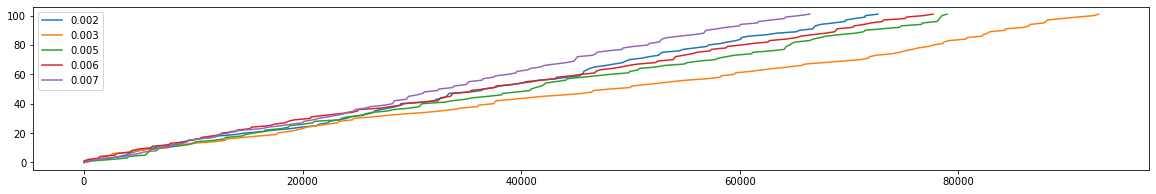

In [61]:
run_3.plot_line_plot("acceleration")

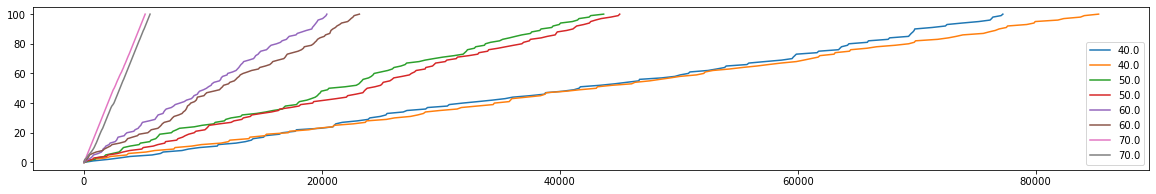

In [60]:
run_2 = Analyse("experiment_2.csv")
run_2.plot_line_plot("number-of-cars")

In [8]:
run_1 = Analyse("experiment_3.csv")

KeyboardInterrupt: 

In [ ]:
run_1.plot_line_plot("number-of-cars")

In [180]:
def plot_line_plot(arrays, titles):
    
    turns = [i for i in range(101)]
    
    for j, arr in enumerate(arrays):
        plt.plot(arr, turns, label=str(titles[j]))
    
    plt.legend()
    plt.show()

In [181]:
def get_titles(charac, target):
    
    res = []
    
    for _, values in charac.items():
        
        res.append(values[target])
    
    return res

In [182]:
def call_framework(path, variable):
    
    data = pd.read_csv(path, low_memory = False)
#     print(data)
    characteristics = get_characteristics(data)
    lane_change_data_all_runs = get_all_lanes_data(data)
    titles = get_titles(characteristics, variable)
    
    plot_line_plot(lane_change_data_all_runs, titles)
    
    return data # for now, to not have to load the entire data once again

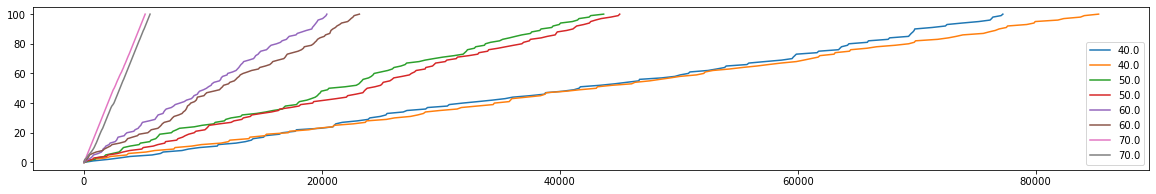

In [184]:
temp_data_returned = call_framework("experiment_2.csv", "number-of-cars")

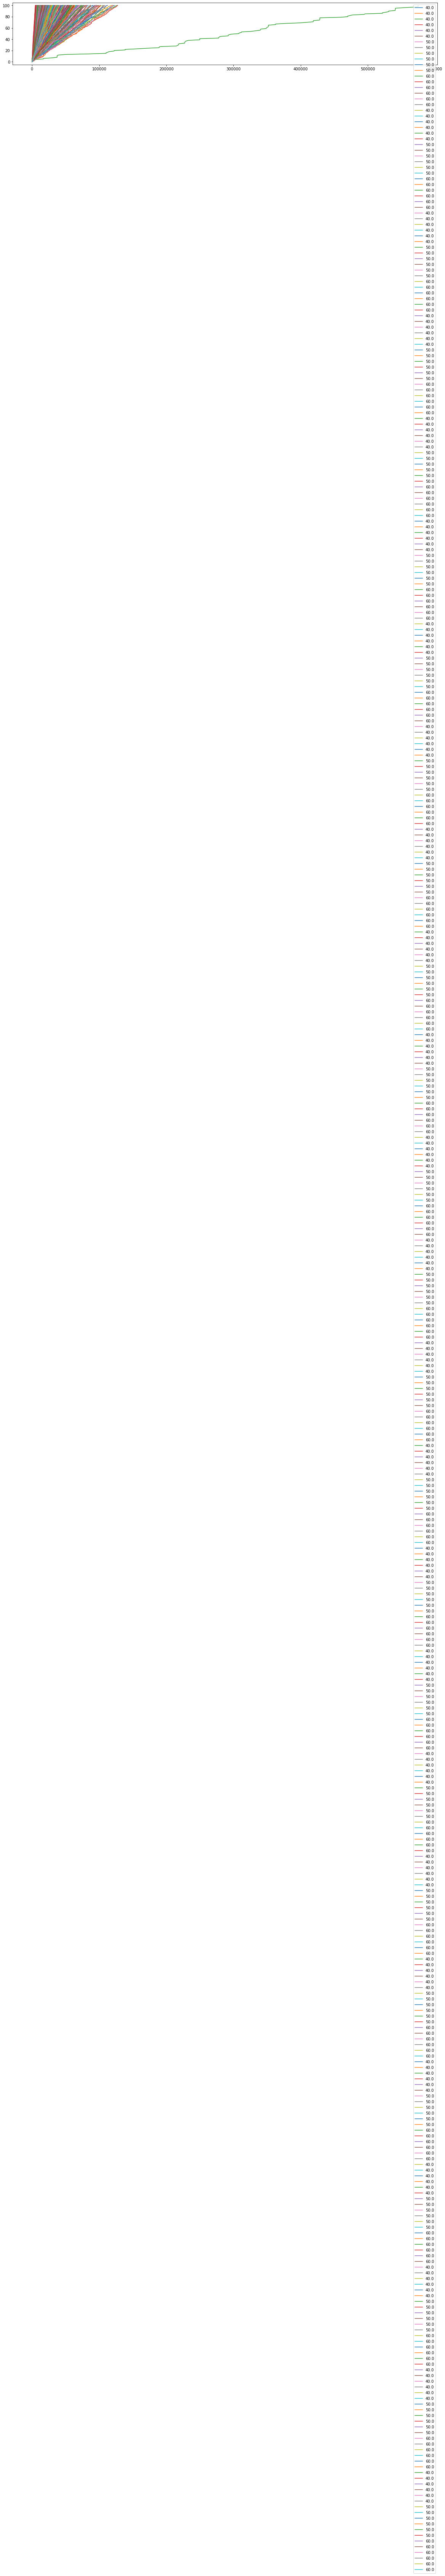

In [185]:
temp_data_returned = call_framework("experiment_3.csv", "number-of-cars")